<a href="https://colab.research.google.com/github/rudramadhabofficial/DeepLearningLabAssignment1/blob/main/dlass5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

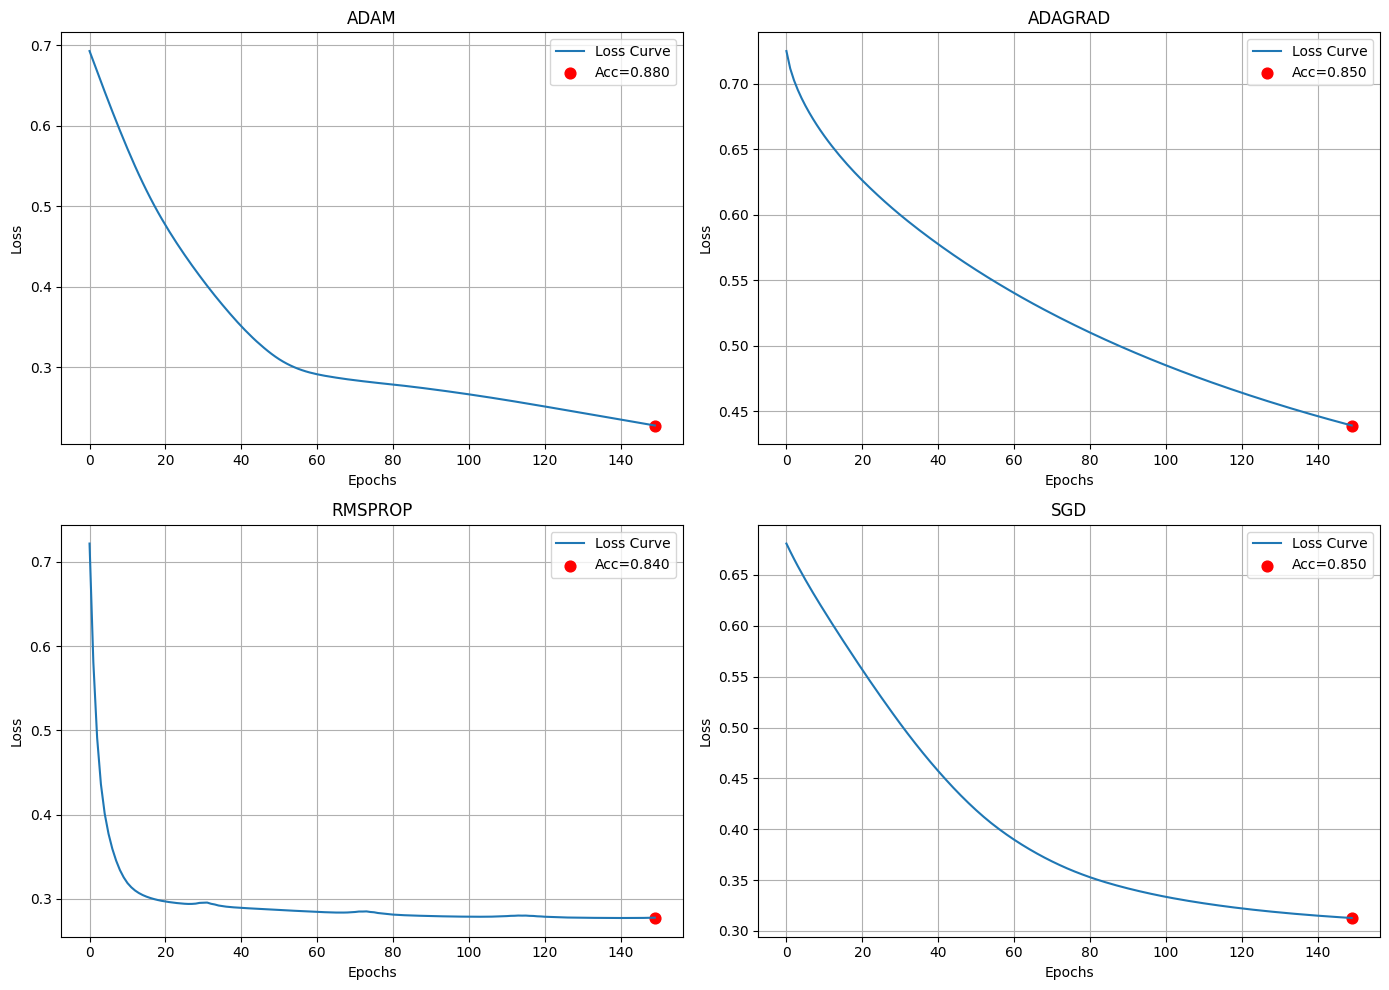

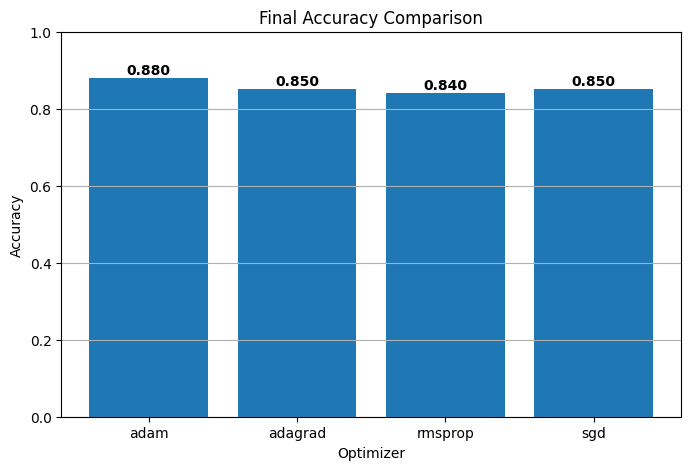

Final Accuracy Scores:
ADAM     : 0.8800
ADAGRAD  : 0.8500
RMSPROP  : 0.8400
SGD      : 0.8500


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dataset
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tiny DNN
class TinyDNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, 2)
        )

    def forward(self, x):
        return self.net(x)

def train_and_eval(optimizer_name, epochs=150):
    model = TinyDNN()
    loss_fn = nn.CrossEntropyLoss()

    if optimizer_name == "adam":
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optimizer_name == "adagrad":
        optimizer = optim.Adagrad(model.parameters(), lr=0.01)
    elif optimizer_name == "rmsprop":
        optimizer = optim.RMSprop(model.parameters(), lr=0.01)
    elif optimizer_name == "sgd":
        optimizer = optim.SGD(model.parameters(), lr=0.1)

    losses = []

    for _ in range(epochs):
        optimizer.zero_grad()
        preds = model(X_train)
        loss = loss_fn(preds, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # Accuracy
    with torch.no_grad():
        test_preds = model(X_test)
        predicted = torch.argmax(test_preds, dim=1)
        acc = accuracy_score(y_test, predicted)

    return losses, acc

# Train all
optimizers = ["adam", "adagrad", "rmsprop", "sgd"]
loss_results = {}
acc_results = {}

for opt in optimizers:
    loss, acc = train_and_eval(opt)
    loss_results[opt] = loss
    acc_results[opt] = acc

# Plot 4 separate graphs (loss + accuracy point)
fig, axs = plt.subplots(2,2, figsize=(14,10))

for ax, opt in zip(axs.flatten(), optimizers):
    ax.plot(loss_results[opt], label="Loss Curve")
    ax.scatter(len(loss_results[opt])-1, loss_results[opt][-1],
               color='red', s=60, label=f"Acc={acc_results[opt]:.3f}")
    ax.set_title(opt.upper())
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# Final comparative BAR chart
plt.figure(figsize=(8,5))
plt.bar(acc_results.keys(), acc_results.values())

plt.title("Final Accuracy Comparison")
plt.xlabel("Optimizer")
plt.ylabel("Accuracy")
plt.ylim(0,1)

for i, (k,v) in enumerate(acc_results.items()):
    plt.text(i, v+0.01, f"{v:.3f}", ha='center', fontweight='bold')

plt.grid(axis='y')
plt.show()

print("Final Accuracy Scores:")
for k,v in acc_results.items():
    print(f"{k.upper():8s} : {v:.4f}")
